
<h1 style="
font-weight: bold; ">Mapping and Visualizing EEG Data</h1>  

<h2  style="color:#FF6347; font-weight:bold">Notebook Overview:</h2>  


This notebook provides a comprehensive guide to mapping and visualizing EEG (electroncephalogram) electrode positions using Python, with a focus on the MNE library.

<h3 style="color:#FF6347;  font-weight:bold">It covers:</h3> 
       
- Installation and import of essential libraries for EEG data analysis.   
- Defining and mapping 2D coordinates of EEG electrodes based on the 10-20 system.
- Visualizing electrode positions to aid in understanding spatial layouts.


In [18]:
!pip install mne



In [19]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
import mne #the `mne` library, which is essential for EEG/MEG data processing and visualization.  

<h2 style="color:#FF6347; font-weight: bold; ">Configuring Electrode Positions :-</h3>  

- This dictionary (`chs`) specifies the 2D coordinates of EEG electrodes based on the 10-20 system, which is commonly used in EEG data analysis.  
- Each key is the electrode name (e.g., 'FP1', 'Fz'), and each value is a list containing the x and y coordinates for that electrode. These coordinates will be used later to visualize electrode positions on a 2D plane.





In [20]:
# Dictionary defining EEG electrode positions using the 10-20 system
# Keys are electrode names; values are [x, y] coordinates
chs = {
    'FP1': [-0.03, 0.08],
    'FP2': [0.03, 0.08],
    'F7': [-0.073, 0.047],
    'F3': [-0.04, 0.041],
    'Fz': [0, 0.038],
    'F4': [0.04, 0.041],
    'F8': [0.073, 0.047],
    'T3': [-0.085, 0],
    'C3': [-0.045, 0],
    'Cz': [0, 0],
    'C4': [0.045, 0],
    'T4': [0.085, 0],
    'T5': [-0.073, -0.047],
    'P3': [-0.04, -0.041],
    'Pz': [0, -0.038],
    'P4': [0.04, -0.041],
    'T6': [0.07, -0.047],
    'O1': [-0.03, -0.08],
    'O2': [0.03, -0.08]
}


In [21]:
# Convert the electrode position dictionary to a DataFrame and transpose
# Electrode names become row indices, and x, y coordinates are columns
channels = pd.DataFrame(chs).transpose()
channels  # Display the DataFrame of electrode positions


,0,1
FP1,-0.030,0.080
FP2,0.030,0.080
F7,-0.073,0.047
F3,-0.040,0.041
Fz,0.000,0.038
F4,0.040,0.041
F8,0.073,0.047
T3,-0.085,0.000
C3,-0.045,0.000
Cz,0.000,0.000


In [22]:
# Expand each electrode position to 3D by adding a z-coordinate of 0
for key in chs.keys():
    chs[key] += [0]  # Append 0 as the z-coordinate
chs  # Display updated dictionary with 3D coordinates

{'FP1': [-0.03, 0.08, 0],
 'FP2': [0.03, 0.08, 0],
 'F7': [-0.073, 0.047, 0],
 'F3': [-0.04, 0.041, 0],
 'Fz': [0, 0.038, 0],
 'F4': [0.04, 0.041, 0],
 'F8': [0.073, 0.047, 0],
 'T3': [-0.085, 0, 0],
 'C3': [-0.045, 0, 0],
 'Cz': [0, 0, 0],
 'C4': [0.045, 0, 0],
 'T4': [0.085, 0, 0],
 'T5': [-0.073, -0.047, 0],
 'P3': [-0.04, -0.041, 0],
 'Pz': [0, -0.038, 0],
 'P4': [0.04, -0.041, 0],
 'T6': [0.07, -0.047, 0],
 'O1': [-0.03, -0.08, 0],
 'O2': [0.03, -0.08, 0]}

<h3 style="color:#FF6347;font-weight: bold;">Creating and Plotting EEG Electrode Montage :-</h3>

- We use MNE's `make_dig_montage` function to create a montage from the 3D electrode positions defined in `chs`.  
- A montage aligns and organizes electrode positions, allowing for accurate visualization and further EEG data analysis.  
- We then plot the montage to visualize the electrode layout.



/tmp/ipykernel_6852/3894566217.py:8: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  fig = mont.plot(show=False)  # Set show=False to modify the figure before displaying


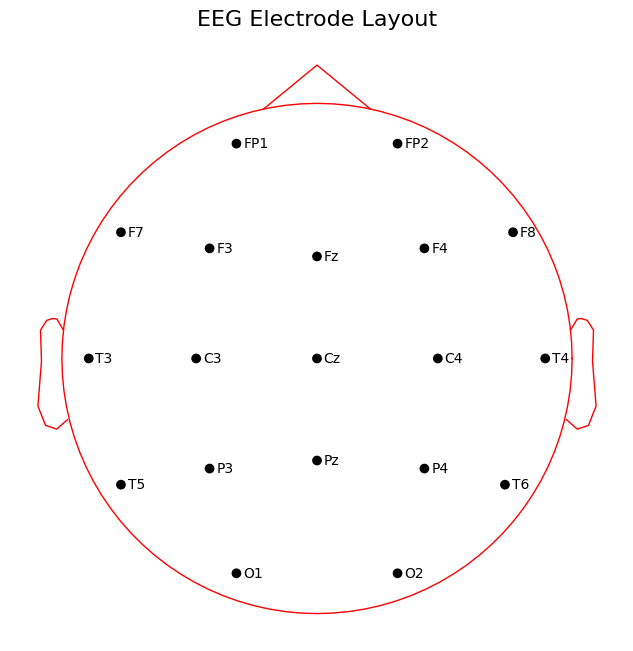

In [23]:
# Import necessary library
import matplotlib.pyplot as plt

# Create a digital montage from the 3D electrode positions
mont = mne.channels.make_dig_montage(chs)

# Plot the montage with color customization
fig = mont.plot(show=False)  # Set show=False to modify the figure before displaying

# Customize the plot using matplotlib
for ax in fig.get_axes():
    # Change the color of electrode points and labels
    for line in ax.get_lines():
        line.set_color('red')  # Change 'red' to your preferred color

plt.suptitle('EEG Electrode Layout', fontsize=16, color='black')  # Add a title for context
plt.show()


<h3 style="color:#FF6347;font-weight: bold;">Loading EEG Dataset :-</h3>

In [24]:
df = pd.read_csv('../data/EEG_Data.csv')
df

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,M,22.0,2014.8.28,13.0,116.0,Healthy control,Healthy control,41.851823,36.771496,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,942,M,26.0,2014.9.19,13.0,118.0,Healthy control,Healthy control,18.986856,19.401387,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,943,M,26.0,2014.9.27,16.0,113.0,Healthy control,Healthy control,28.781317,32.369230,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,944,M,24.0,2014.9.20,13.0,107.0,Healthy control,Healthy control,19.929100,25.196375,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


<h3 style="color:#FF6347;font-weight: bold;">Identifying and Removing Empty Columns :-</h3>


In [25]:
# Calculate the number of missing values in each column
mis = df.isna().sum()

# Identify the first column with all values missing
separator = mis[mis == df.shape[0]].index[0]

# Slice the DataFrame to include only relevant columns, dropping the first empty column
df = df.loc[:, 'main.disorder':separator].drop(separator, axis=1)
df  # Display the cleaned DataFrame

df

,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,1.993727,1.765493,1.464281,1.501948,1.707307,1.553448,1.552658,1.388662,1.592717,1.806598
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,0.903383,0.931967,0.437117,0.930843,1.234874,1.373268,1.411808,1.140695,1.118041,3.162143
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,1.096713,1.691152,1.505663,1.133891,1.661768,1.403429,1.349457,1.270525,1.408471,1.454618
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,1.115040,1.122776,2.128138,1.648217,1.147666,1.049152,1.131654,1.415856,1.391048,1.527403
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,1.193191,2.320845,3.562820,1.441662,1.018804,1.274009,2.350806,2.307730,2.129431,3.766860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Healthy control,Healthy control,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,...,1.966436,1.763397,1.285942,2.437923,2.130979,1.727413,1.710518,2.574734,2.533354,5.596057
941,Healthy control,Healthy control,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,...,2.701922,2.685138,2.648595,2.559590,3.054965,3.163359,3.247100,2.646515,3.385173,3.085049
942,Healthy control,Healthy control,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,...,3.258838,2.434620,1.501337,0.840513,1.733498,1.610465,1.644675,1.216763,1.614421,1.164097
943,Healthy control,Healthy control,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,...,1.849005,1.678465,3.655796,1.429330,3.151128,1.630643,1.888551,1.447402,1.819110,1.302056


<h3 style="color:#FF6347;font-weight: bold;">Reformatting Column Names :-</h3>


In [26]:
# Define a function to reformat column names to the format 'band.channel'
def reformat_name(name):
    band, _, channel = name[5:].split(sep='.')
    return f'{band}.{channel}'

# Vectorize the reformat_name function to apply it to an array of column names
reformat_vect = np.vectorize(reformat_name)
new_colnames = np.concatenate((df.columns[:2], reformat_vect(df.columns[2:])))

# Update the DataFrame with the new column names
renamed_df = df.set_axis(new_colnames, axis=1)
renamed_df.columns  # Display the updated column names

Index(['main.disorder', 'specific.disorder', 'delta.FP1', 'delta.FP2',
       'delta.F7', 'delta.F3', 'delta.Fz', 'delta.F4', 'delta.F8', 'delta.T3',
       ...
       'gamma.Cz', 'gamma.C4', 'gamma.T4', 'gamma.T5', 'gamma.P3', 'gamma.Pz',
       'gamma.P4', 'gamma.T6', 'gamma.O1', 'gamma.O2'],
      dtype='object', length=116)

<h3 style="color:#FF6347;font-weight: bold;">Calculating Mean by Disorder and Reshaping Data :-</h3>


In [27]:
mean = renamed_df.groupby('specific.disorder').mean(numeric_only=True).reset_index()
mean

,specific.disorder,delta.FP1,delta.FP2,delta.F7,delta.F3,delta.Fz,delta.F4,delta.F8,delta.T3,delta.C3,...,gamma.Cz,gamma.C4,gamma.T4,gamma.T5,gamma.P3,gamma.Pz,gamma.P4,gamma.T6,gamma.O1,gamma.O2
0,Acute stress disorder,21.010092,21.610872,18.642425,20.605466,22.649437,21.081192,18.043201,13.329125,18.174049,...,2.222058,2.010888,2.148256,1.853432,2.026037,2.053871,2.033871,1.913955,2.841223,2.453071
1,Adjustment disorder,22.409204,25.012049,19.624888,20.485676,22.977661,21.877866,17.720373,11.994227,17.534495,...,3.033030,2.794749,3.314235,2.027649,2.464426,2.680733,2.665490,2.451450,4.044013,3.803860
2,Alcohol use disorder,19.031935,18.716010,16.027841,17.875001,19.305932,18.750400,15.929314,10.745089,15.473224,...,1.950866,1.829302,1.741237,1.554061,1.735008,1.755539,1.788144,1.669162,2.721851,2.557966
3,Behavioral addiction disorder,18.631096,19.062980,15.305196,17.757391,20.445102,18.428716,14.997956,10.111161,15.204398,...,2.917787,2.619295,3.227874,2.177208,2.365449,2.429706,2.430918,2.212409,3.642643,3.729947
4,Bipolar disorder,20.920267,21.376145,19.441296,19.799656,20.603657,19.950937,16.799036,12.930464,17.450318,...,3.258559,3.266933,3.086824,2.412918,2.837179,2.914106,2.873441,3.110626,3.945114,4.178363
5,Depressive disorder,20.561897,22.291184,17.826752,19.394730,20.836428,20.137376,17.662349,12.056048,16.672858,...,2.926890,3.047236,2.874408,2.339983,2.539246,2.534559,2.557899,2.522967,3.696353,3.425693
6,Healthy control,18.383673,19.497090,15.526428,17.398592,18.687952,17.443004,16.333668,9.459207,14.955463,...,2.450552,2.396678,2.665862,1.758386,2.067072,2.139128,2.173021,2.146132,2.702684,2.990976
7,Obsessive compulsitve disorder,18.261254,19.495833,15.907084,16.771218,18.489591,17.555625,14.933192,10.845902,14.746984,...,2.773261,2.887474,3.647183,2.077698,2.360582,2.433777,2.492759,2.556206,3.074281,3.304698
8,Panic disorder,18.514396,19.403421,17.889956,17.804156,20.004586,18.699839,17.107922,12.282164,15.975269,...,2.433170,2.341830,2.265596,2.032189,2.215160,2.176705,2.170567,2.098515,3.960791,4.539175
9,Posttraumatic stress disorder,22.263038,22.424307,18.982890,19.906076,21.546656,20.148717,17.807032,13.828257,17.335792,...,3.224249,3.566281,3.468531,2.477028,2.896576,2.792276,2.870593,2.772858,4.559529,3.706658


In [28]:
bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
mean = pd.wide_to_long(mean, stubnames=bands, i='specific.disorder', j='channel', sep='.', suffix=r'\w+')
mean

,,delta,theta,alpha,beta,highbeta,gamma
specific.disorder,channel,,,,,,
Acute stress disorder,FP1,21.010092,21.449696,29.986463,14.860550,2.419641,2.379800
Adjustment disorder,FP1,22.409204,15.188234,27.723441,11.964587,2.481214,3.110645
Alcohol use disorder,FP1,19.031935,14.487469,31.710026,12.026554,2.016023,2.193860
Behavioral addiction disorder,FP1,18.631096,13.186498,16.906313,9.149485,2.067112,2.643175
Bipolar disorder,FP1,20.920267,12.899219,22.731308,13.258815,2.519366,3.336706
...,...,...,...,...,...,...,...
Obsessive compulsitve disorder,O2,11.490165,9.438324,31.925618,11.461414,2.151135,3.304698
Panic disorder,O2,13.623837,8.332327,20.802839,12.606385,2.855598,4.539175
Posttraumatic stress disorder,O2,13.845669,10.241304,28.496422,14.237963,2.411561,3.706658


<h3 style="color:#FF6347; font-weight: bold; ">Plotting EEG Data on a Topomap :-</h3>

- The `plot_topomap` function visualizes EEG data on a topographical map:   
- `positions` specifies the (x, y) positions of the electrodes.  
- The function uses `mne.viz.plot_topomap` to create the plot and adds a colorbar to the figure for better interpretation of values.  
- Optional parameters allow customization of the plot appearance, including color maps, colorbar size, and masking of specific values.


In [29]:
def plot_topomap(data, positions, ax, cmap='viridis_r', vmin=None, vmax=None):
    """
    Plot a topomap with a colorbar using MNE's plot_topomap and add a box around the image and colorbar.

    Parameters:
    - data (array-like): EEG values to plot.
    - positions (array-like): Electrode positions in 2D.
    - ax (Axes): Axis to draw the plot.
    - cmap (str): Colormap for visualization (inverted by default).
    - vmin, vmax (float): Minimum and maximum values for the colorbar.
    """
    sphere = (0, 0, 0, 0.09)  # Defines head dimensions for visualization
    im, _ = mne.viz.plot_topomap(
        data, positions, axes=ax, cmap=cmap, vlim=(vmin, vmax), sphere=sphere, show=False
    )
    ax.set_xticks([])
    ax.set_yticks([])

    # Adding a colorbar to the subplot
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('EEG Intensity', fontsize=10)

    # Create a bounding box around the topomap and colorbar
    ax_bbox = ax.get_position()
    cbar_bbox = cbar.ax.get_position()

    # Determine the bounding box coordinates for the combined area
    x_min = min(ax_bbox.x0, cbar_bbox.x0)
    x_max = max(ax_bbox.x1, cbar_bbox.x1)
    y_min = min(ax_bbox.y0, cbar_bbox.y0)
    y_max = max(ax_bbox.y1, cbar_bbox.y1)

    # Add a box around the subplot
    rect = patches.Rectangle(
        (0, 0), 1, 1, transform=ax.transAxes, color='black', fill=False, linewidth=2
    )
    ax.add_patch(rect)


<h3 style="color:#FF6347;font-weight: bold;">Plotting EEG Topographic Maps for Conditions</h3>
 
- We define the conditions (disorders) we are interested in and order them for visualization.  
- The `visualize` function is then called to visualize EEG data across these conditions, using the `coolwarm` colormap.  
- The function arranges the plots in a grid, where each plot represents EEG data for a particular band and disorder.  
- The resulting plots are displayed for easy interpretation of the data.


In [30]:
def visualize(dataset, channels, bands, conditions, cmap='viridis_r'):
    
    """
    Create topographical plots for all combinations of bands and conditions with boxes, column titles, and row labels.

    Parameters:
    - dataset (DataFrame): Data containing EEG levels for each condition and band.
    - channels (DataFrame): Electrode positions.
    - bands (list): List of bands to plot.
    - conditions (list): List of conditions/disorders to plot.
    - cmap (str): Colormap for plotting (inverted by default).
    """
    
    global fig  # Make fig global so we can access it in plot_topomap_with_colorbar
    num_bands = len(bands)
    num_conditions = len(conditions)
    fig, axes = plt.subplots(num_conditions, num_bands, figsize=(3 * num_bands, 3 * num_conditions), constrained_layout=True)

    for j, band in enumerate(bands):
        # Calculate the vmin and vmax for each band across all conditions
        band_data = dataset[band].values.flatten()  # Flatten to ensure we have a single array
        vmin = np.min(band_data)
        vmax = np.max(band_data)

        for i, disorder in enumerate(conditions):
            values = dataset.loc[disorder][band].values  # Select data for specific band and condition
            ax = axes[i, j] if num_conditions > 1 else axes[j]
            plot_topomap(values, channels.to_numpy(), ax, cmap=cmap, vmin=vmin, vmax=vmax)

        # Add band names as titles for each column
        axes[0, j].set_title(band, fontsize=12, pad=10)

    # Add overarching titles for each condition row
    for i, disorder in enumerate(conditions):
        axes[i, 0].annotate(
            disorder, xy=(0, 0.5), xycoords='axes fraction',
            xytext=(-axes[i, 0].yaxis.labelpad - 15, 0),
            textcoords='offset points',
            size='large', ha='right', va='center', rotation=90
        )

    plt.show()

# Example bands and conditions to plot
bands_to_plot = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
conditions_to_plot = ['Healthy control', 'Posttraumatic stress disorder']


<h3 style="color:#FF6347; font-weight: bold;">Plotting EEG Topographic Maps for PTSD and Healthy Control :- </h3>
 
- We define two conditions: "Healthy control" and "Posttraumatic stress disorder."  
- The `visualize` function is used to visualize the EEG data for these two conditions using the `coolwarm` colormap.  
- The plots for these two conditions will be displayed for comparison.


In [31]:
mean

,,delta,theta,alpha,beta,highbeta,gamma
specific.disorder,channel,,,,,,
Acute stress disorder,FP1,21.010092,21.449696,29.986463,14.860550,2.419641,2.379800
Adjustment disorder,FP1,22.409204,15.188234,27.723441,11.964587,2.481214,3.110645
Alcohol use disorder,FP1,19.031935,14.487469,31.710026,12.026554,2.016023,2.193860
Behavioral addiction disorder,FP1,18.631096,13.186498,16.906313,9.149485,2.067112,2.643175
Bipolar disorder,FP1,20.920267,12.899219,22.731308,13.258815,2.519366,3.336706
...,...,...,...,...,...,...,...
Obsessive compulsitve disorder,O2,11.490165,9.438324,31.925618,11.461414,2.151135,3.304698
Panic disorder,O2,13.623837,8.332327,20.802839,12.606385,2.855598,4.539175
Posttraumatic stress disorder,O2,13.845669,10.241304,28.496422,14.237963,2.411561,3.706658


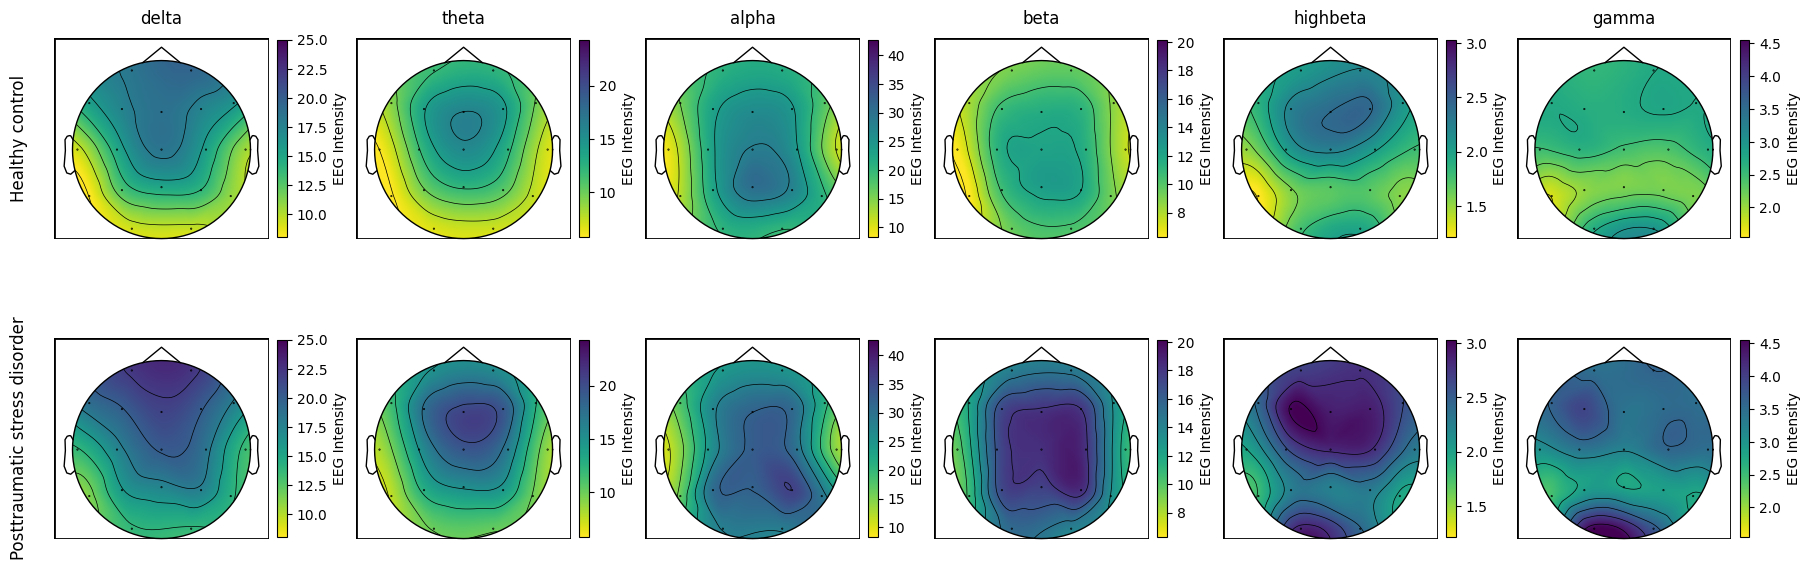

In [32]:
visualize(mean, channels, bands=bands_to_plot, conditions=conditions_to_plot)